Question 13

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.mlab as mlab
from scipy.stats import beta
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


We assume sigma_f^2 is 1 because that only scales y-axis part of space of functions, so this is not considered as important. Real important part is a length scale, which controls the smoothness of the functions.

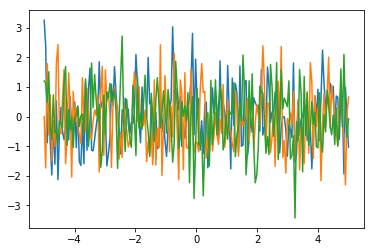

In [2]:
def getPrior(x, lengthscale, number):
    K = np.exp(-cdist(x,x)/lengthscale**2)
    mu = np.zeros(x.shape)
    f = np.random.multivariate_normal(mu.flatten(), K, number)
    return f

x = np.linspace(-5, 5, 200).reshape(-1, 1)
f1 = getPrior(x, 0.01, 3)

plt.plot(x, f1.transpose())

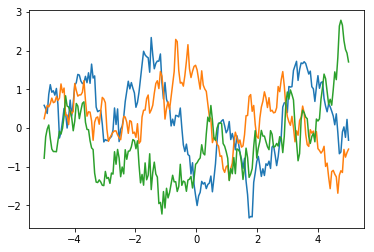

In [3]:
f2 = getPrior(x, 1, 3)
plt.plot(x, f2.transpose())

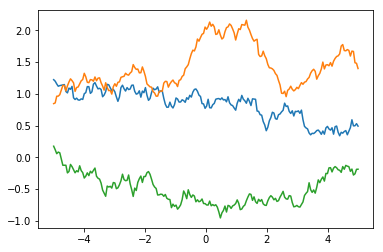

In [4]:
f3 = getPrior(x, 5, 3)
plt.plot(x, f3.transpose())

Question 14

In [5]:
x1 = np.linspace(-np.pi, np.pi, 7)
xstar = np.linspace(-np.pi, np.pi, 100)
e = np.random.normal(0, 0.5)
y = np.sin(x1) + e
estar = np.random.normal(0, 0.5, 100)
ystar = np.sin(xstar) + estar
xstar = xstar.reshape(-1, 1)
x1 = x1.reshape(-1, 1)
noise = 0*np.identity(7)


In [6]:
def kernel(l, xi, xj):
    cov = np.zeros((len(xi), len(xj)))
    for i in range(len(xi)):
        for j in range (len(xj)):
            a = np.exp(-(xi[i]-xj[j]).T*(xi[i]-xj[j])/(l**2))
            cov [i][j] = a            
    return cov
    


For the predictive posterior we used the 7 data points as our training data and then 100 extra points as our target 

(100, 7)
(7, 7)
(100, 100)
(7, 100)
(100,)
(100, 100)
(100, 100)


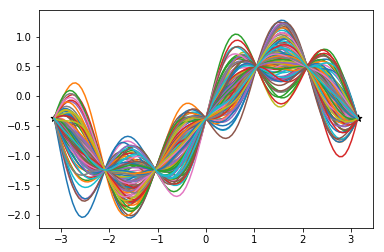

In [60]:
l = 1
p1 = kernel(l, xstar, x1)
p2 = np.linalg.inv(kernel(l, x1, x1)+noise)
p3 = kernel(l, xstar, xstar)
p4 = kernel(l, x1, xstar)
print(p1.shape)
print(p2.shape)
print(p3.shape)
print(p4.shape)
mean = p1@p2@y
covariance = p3 - (p1@p2@p4)
prepost = np.random.multivariate_normal(mean, covariance, 100)
print(mean.shape)
print(covariance.shape)
print(prepost.shape)

plt.scatter(x1, y, marker="*", c="black", s=50)
for p in prepost:
    plt.plot(xstar, p)


The following graph shows 3 different samples from the posterior. These mappings go exactly through the training data which are the black stars in the plot. However, when sampling points from one of them it can be observe how the values from sample to sample start to differ. This difference grows when going away from the training data points as seen by the blue points and as the sample starts approaching it, all the graphs starts to converge again as it can be seen when observing the green points. This can be explained by the assumption encoded within the model where, if one point is close to another unknown one, one can be certain that the unknown point will be somewhere close to where the known one was found. This certainty is encoded in a Gaussian distribution form.

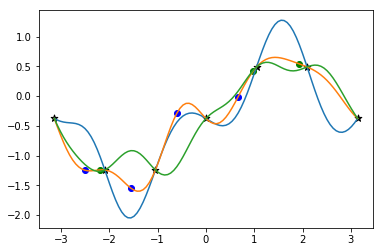

In [65]:
plt.scatter(x1, y, marker="*", c="black", s=50)
for i in range(3):
    plt.plot(xstar, prepost[i])
plt.scatter(xstar[10], prepost[1,10], c="blue")
plt.scatter(xstar[25], prepost[1,25], c="blue")
plt.scatter(xstar[60], prepost[1,60], c="blue")
plt.scatter(xstar[40], prepost[1,40], c="blue")
plt.scatter(xstar[15], prepost[1,15], c="green")
plt.scatter(xstar[65], prepost[1,65], c="green")
plt.scatter(xstar[80], prepost[1,80], c="green")





The following graph shows the predictive mean and the predictive variance. It essentially, provides a range in which the samples are "allowed" to differ from eachother when predicting an unknown point. This uncertainty peaks right in the middle between two points and is reduced as the training data is known.

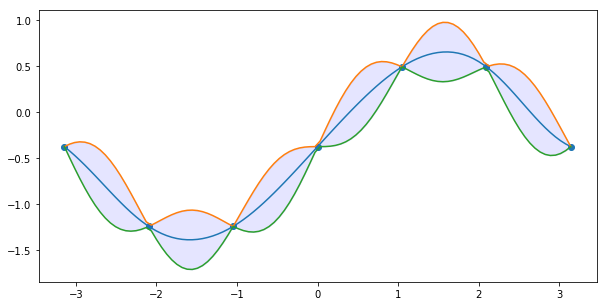

In [68]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x1, y)
a = []
b = []
for i in range (len(covariance)):
    a.append(mean[i] + np.sqrt(covariance[i][i]))
    b.append(mean[i] - np.sqrt(covariance[i][i]))
ax.plot(xstar, mean)
ax.plot(xstar, a)
ax.plot(xstar, b)
ax.fill_between(xstar.flatten(), a, b, alpha=0.1, color="blue")